In [2]:
import os
import pandas as pd
import numpy as np
from src.my_settings import settings
from src.timecourse import extract_era_corr_sphere

In [ ]:
# Settings
sett = settings()
subject_list = sett["sub_labels"]
run_list = sett["run_labels"]
task_list = ["nf", "sham"]
n_subjects = len(subject_list)

In [ ]:
# Iterate over subjects and runs, extract timecourses, save in array

# Define output df with the columns subject, task, run,
# time_series, signal_change, signal_change_avg,
# imagery_tcs, correlations_online,correlations_offline
df = pd.DataFrame(
    columns=[
        "subject",
        "task",
        "run",
        "time_series",
        "signal_change",
        "signal_change_avg",
        "imagery_tcs",
        "correlations_online",
        "correlations_offline",
    ]
)


for subject in subject_list:
    print(f"Processing subject {subject}")
    for task in task_list:
        for run in run_list:
            # Extract
            (
                time_series,
                signal_change,
                signal_change_avg,
                imagery_tcs,
                correlations_online,
                correlations_offline,
            ) = extract_era_corr_sphere(
                subject,
                task,
                run,
                sphere_radius=6,
                window_size_online=8,
                window_size_offline=4,
            )

            # concat to df
            df = pd.concat(
                [
                    df,
                    pd.DataFrame(
                        {
                            "subject": subject,
                            "task": task,
                            "run": run,
                            "time_series": [time_series],
                            "signal_change": [signal_change],
                            "signal_change_avg": [signal_change_avg],
                            "imagery_tcs": [imagery_tcs],
                            "correlations_online": [correlations_online],
                            "correlations_offline": [correlations_offline],
                        }
                    ),
                ],
                ignore_index=True,
            )

Processing subject 01
Found physio file for sub-01 task-nf run-1
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-01 task-nf run-2
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-01 task-sham run-1
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-01 task-sham run-2
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Processing subject 02
Found physio file for sub-02 task-nf run-1
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-02 task-nf run-2
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-02 task-sham run-1
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-02 task-sham run-2
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Processing subject 03
Found physio file for sub-03 task-nf run-1
[Memory]0.0s, 0.0min    : Loading _filter_and_extract...
Found physio file for sub-

In [5]:
df

,subject,task,run,time_series,signal_change,signal_change_avg,imagery_tcs,correlations_online,correlations_offline
0,01,nf,1,"[[-0.052064873, -0.19650805], [1.1172143, 1.44...","[[0.0014340281, -0.1438926], [1.1707132, 1.497...","[-0.07122929, 1.3341633, 0.4778407, 0.62176144...","[[[-1.0797353982925415, 0.07699484378099442, -...","[[0.5020526540465653, 0.36712998850271106, 0.3...","[[0.7958218716084957, 0.4763880744576454, -0.4..."
1,01,nf,2,"[[-0.0072518047, 0.11862691], [1.6130145, 0.57...","[[0.08591612, 0.19560286], [1.7061824, 0.65028...","[0.1407595, 1.1782361, 0.81486297, 0.21775527,...","[[[0.3329281508922577, 1.1609039306640625, 0.7...","[[0.8080029492266476, 0.6763813210418448, 0.50...","[[0.9072484613861889, 0.9700915602152236, 0.77..."
2,01,sham,1,"[[0.12249942, 0.2064174], [0.3110516, -0.04866...","[[0.0906011, 0.1864875], [0.2791533, -0.068596...","[0.13854429, 0.10527859, 0.1400293, -0.6498072...","[[[-1.4131453037261963, -0.8092849254608154, -...","[[-0.6750859562307596, -0.3348756416380638, -0...","[[-0.39750922471284866, 0.3558918237686157, 0...."
3,01,sham,2,"[[-0.07201802, -0.118729495], [1.9282075, 1.52...","[[0.07440811, 0.06454899], [2.0746336, 1.70772...","[0.06947855, 1.8911783, 0.13222465, -0.1169443...","[[[0.35212811827659607, -0.27269119024276733, ...","[[0.528595435898751, 0.462019607424736, 0.4989...","[[0.9118619197979569, 0.7011126370052807, 0.18..."
4,02,nf,1,"[[0.0013512339, 0.21336412], [2.3656101, 1.065...","[[0.09984073, 0.33338612], [2.4640996, 1.18542...","[0.21661343, 1.8247612, -0.15113737, 0.0922423...","[[[-0.192901611328125, -1.2937318086624146, 2....","[[-0.10439429711550474, -0.12866557738743722, ...","[[-0.7906264439225197, -0.8324614204466343, -0..."
5,02,nf,2,"[[0.003776662, -0.10501598], [1.2406191, 1.328...","[[0.11492148, 0.01485306], [1.3517638, 1.44833...","[0.06488727, 1.4000504, -0.3849838, 0.29631546...","[[[0.13651476800441742, -0.18971964716911316, ...","[[0.3877628374029882, 0.26092956587672234, 0.3...","[[0.9690362811088562, 0.5237465668469667, 0.23..."
6,02,sham,1,"[[-0.22879656, 0.106568195], [1.4372903, -1.38...","[[-0.11413818, 0.1373497], [1.5519487, -1.3533...","[0.011605758, 0.09930277, -1.4132348, -2.04569...","[[[-0.15294194221496582, 0.25513410568237305, ...","[[0.10387017391622066, 0.12365764006972313, -0...","[[0.6045817732810974, -0.5865228486945853, -0...."
7,02,sham,2,"[[0.081269614, -0.21275756], [-0.87747437, 2.3...","[[0.27992874, -0.09801434], [-0.67881525, 2.48...","[0.0909572, 0.90281755, 1.837664, -0.42368728,...","[[[-1.2364091873168945, 2.1544599533081055, -0...","[[0.3715030556777492, 0.32419318798929453, 0.3...","[[0.322692958638072, 0.6244701752439141, 0.227..."
8,03,nf,1,"[[0.10968733, 0.089396775], [-0.08754757, 0.88...","[[0.30992866, 0.2527262], [0.11269377, 1.05128...","[0.28132743, 0.58198774, 0.90576905, 0.7516091...","[[[0.14435812830924988, 0.9985228776931763, -0...","[[-0.02919596340507269, -0.1610939537640661, -...","[[-0.9743773639202118, -0.3744889125227928, -0..."
9,03,nf,2,"[[-0.12856321, -0.17845707], [1.2454673, 2.300...","[[-0.051397324, -0.053870805], [1.3226331, 2.4...","[-0.052634064, 1.8739994, -1.3947597, -0.89938...","[[[0.7088164687156677, 0.3497363328933716, 1.6...","[[0.8361378751287702, 0.7267087679356337, 0.71...","[[0.8653090498410165, 0.8830189269501716, 0.99..."


In [ ]:
# save df
# df.to_pickle(os.path.join('spheres_timecourses.pkl'))

# load df
df = pd.read_pickle("spheres_timecourses.pkl")

In [ ]:
# get all imagery tcs
imagery_tcs = df[df["task"] == "nf"]["imagery_tcs"].values
imagery_tcs_sham = df[df["task"] == "sham"]["imagery_tcs"].values

n_rows = len(imagery_tcs)

# init array for left PMC to store
tcs_left_pmc = np.zeros((n_rows, 20))
tcs_right_pmc = np.zeros((n_rows, 20))

tcs_left_pmc_sham = np.zeros((n_rows, 20))
tcs_right_pmc_sham = np.zeros((n_rows, 20))

for i, tcs in enumerate(imagery_tcs):
    tcs_left_pmc[i, :] = np.mean(imagery_tcs[i][0, :, :], axis=0)
    tcs_right_pmc[i, :] = np.mean(imagery_tcs[i][1, :, :], axis=0)

    tcs_left_pmc_sham[i, :] = np.mean(imagery_tcs_sham[i][0, :, :], axis=0)
    tcs_right_pmc_sham[i, :] = np.mean(imagery_tcs_sham[i][1, :, :], axis=0)


In [ ]:
# get correlations
correlations_online = df[df["task"] == "nf"]["correlations_online"].values
correlations_online_sham = df[df["task"] == "sham"]["correlations_online"].values

correlations_offline = df[df["task"] == "nf"]["correlations_offline"].values
correlations_offline_sham = df[df["task"] == "sham"]["correlations_offline"].values

# concatenate all correlations
correlations_online = np.concatenate(correlations_online)
correlations_online_sham = np.concatenate(correlations_online_sham)

correlations_offline = np.concatenate(correlations_offline)
correlations_offline_sham = np.concatenate(correlations_offline_sham)

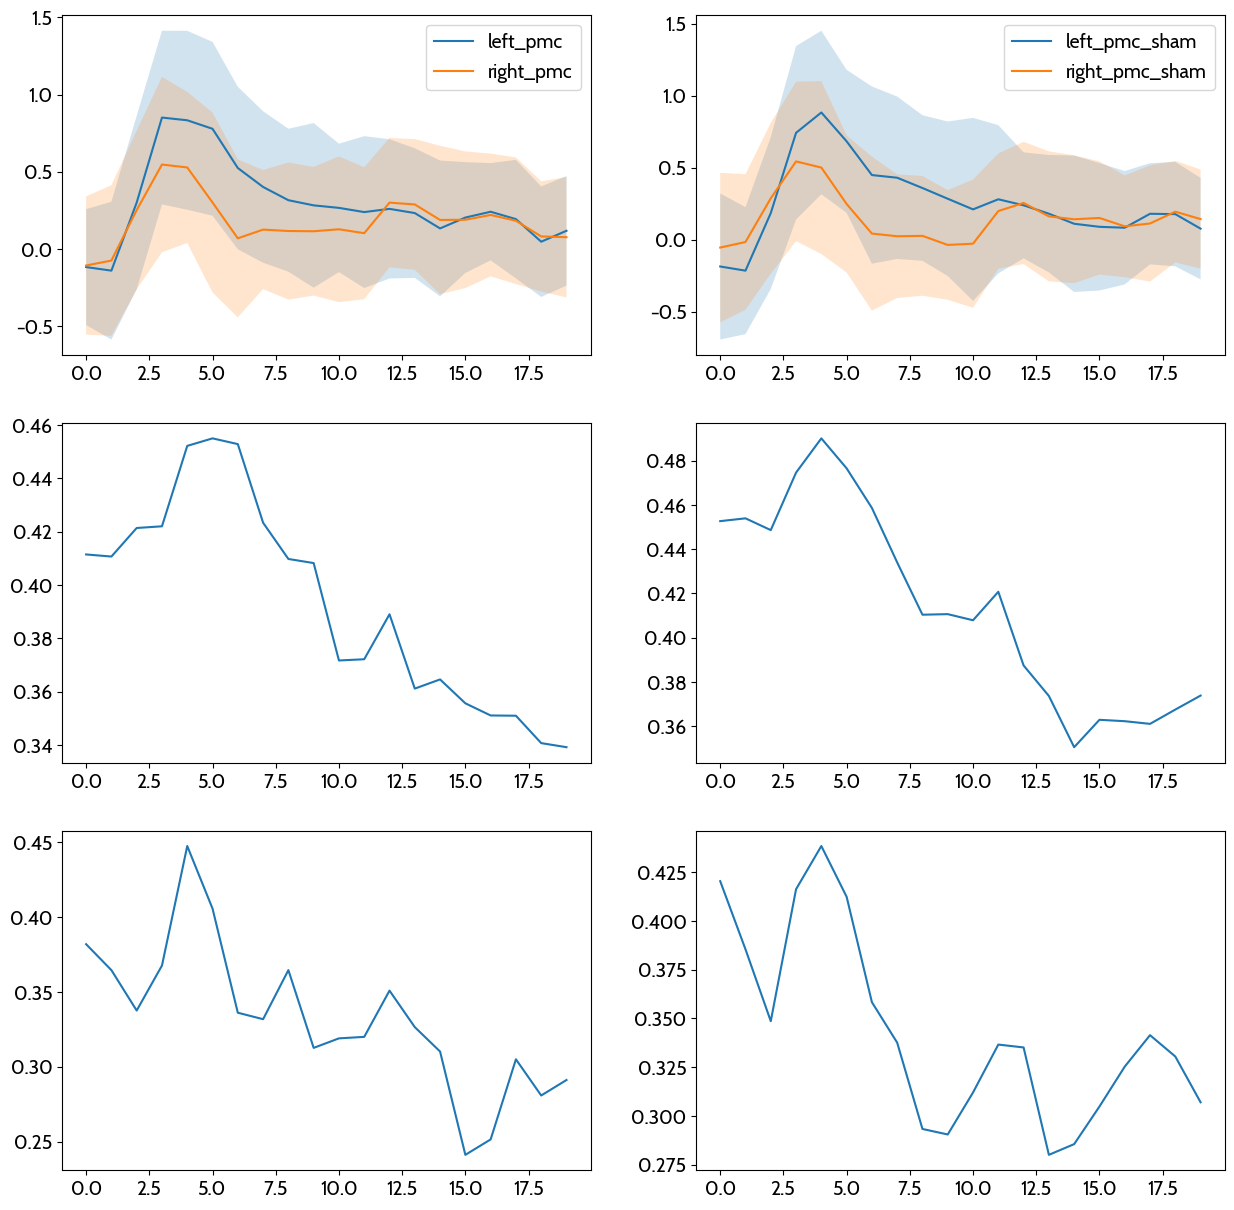

In [ ]:
# plot the mean of tcs_left_pmc and tcs_right_pmc
import matplotlib.pyplot as plt

# open figure
plt.figure(figsize=(15, 15))

# subplot 2 columns 1 row
plt.subplot(3, 2, 1)


plt.plot(np.mean(tcs_left_pmc, axis=0), label="left_pmc")
plt.plot(np.mean(tcs_right_pmc, axis=0), label="right_pmc")

# sd
plt.fill_between(
    range(20),
    np.mean(tcs_left_pmc, axis=0) - np.std(tcs_left_pmc, axis=0),
    np.mean(tcs_left_pmc, axis=0) + np.std(tcs_left_pmc, axis=0),
    alpha=0.2,
)
plt.fill_between(
    range(20),
    np.mean(tcs_right_pmc, axis=0) - np.std(tcs_right_pmc, axis=0),
    np.mean(tcs_right_pmc, axis=0) + np.std(tcs_right_pmc, axis=0),
    alpha=0.2,
)


plt.legend()

plt.subplot(3, 2, 2)

plt.plot(np.mean(tcs_left_pmc_sham, axis=0), label="left_pmc_sham")
plt.plot(np.mean(tcs_right_pmc_sham, axis=0), label="right_pmc_sham")

# sd
plt.fill_between(
    range(20),
    np.mean(tcs_left_pmc_sham, axis=0) - np.std(tcs_left_pmc_sham, axis=0),
    np.mean(tcs_left_pmc_sham, axis=0) + np.std(tcs_left_pmc_sham, axis=0),
    alpha=0.2,
)
plt.fill_between(
    range(20),
    np.mean(tcs_right_pmc_sham, axis=0) - np.std(tcs_right_pmc_sham, axis=0),
    np.mean(tcs_right_pmc_sham, axis=0) + np.std(tcs_right_pmc_sham, axis=0),
    alpha=0.2,
)

plt.legend()

plt.subplot(3, 2, 3)

plt.plot(np.mean(correlations_online, axis=0), label="nf")
# plt.fill_between(range(20), np.mean(correlations_online, axis=0) - np.std(correlations_online, axis=0), np.mean(correlations_online, axis=0) + np.std(correlations_online, axis=0), alpha=0.2)

plt.subplot(3, 2, 4)

plt.plot(np.mean(correlations_online_sham, axis=0), label="sham")
# plt.fill_between(range(20), np.mean(correlations_online_sham, axis=0) - np.std(correlations_online_sham, axis=0), np.mean(correlations_online_sham, axis=0) + np.std(correlations_online_sham, axis=0), alpha=0.2)

plt.subplot(3, 2, 5)

plt.plot(np.mean(correlations_offline, axis=0), label="nf")
# plt.fill_between(range(20), np.mean(correlations_offline, axis=0) - np.std(correlations_offline, axis=0), np.mean(correlations_offline, axis=0) + np.std(correlations_offline, axis=0), alpha=0.2)

plt.subplot(3, 2, 6)

plt.plot(np.mean(correlations_offline_sham, axis=0), label="sham")
# plt.fill_between(range(20), np.mean(correlations_offline_sham, axis=0) - np.std(correlations_offline_sham, axis=0), np.mean(correlations_offline_sham, axis=0) + np.std(correlations_offline_sham, axis=0), alpha=0.2)
